<a href="https://colab.research.google.com/github/aguscura/UBA-data-science/blob/main/spark_S17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**S17:** La antigüedad promedio de los usuarios y el nombre del usuario más antiguo cuyas última review contenga la palabra ‘pizza’ (2 PUNTOS)


In [18]:
!pip install pyspark
# !pip install -U -q PyDrive
# !apt update
# !apt install openjdk-8-jdk-headless -qq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext
from pyspark.sql import SQLContext
import pandas as pd
from tqdm import tqdm
from datetime import date
from datetime import datetime, timedelta

In [20]:
!gdown "1owjSBHKLx0pJMdQYtKUIfiXqBV3lfCdS"

Downloading...
From: https://drive.google.com/uc?id=1owjSBHKLx0pJMdQYtKUIfiXqBV3lfCdS
To: /content/user.csv
100% 2.71G/2.71G [00:11<00:00, 234MB/s]


In [ ]:
#Creamos el Spark Context
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

Paso el csv a parquet. Por un tema de RAM solo me traigo algunas columnas

In [ ]:
#Chequeo columnas del df
df = pd.read_csv("/content/user.csv")
df.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

# **La antigüedad promedio de los usuarios**

In [ ]:
#Paso a parquet. Acá solo tomo algunas columnas por el RAM
df = pd.read_csv("/content/user.csv", usecols=["user_id","name","yelping_since"])
df.to_parquet("/content/user.parquet")

In [ ]:
#Leemos archivo parquet
sqlContext = SQLContext(sc)
rdd = sqlContext.read.parquet('/content/user.parquet').rdd.repartition(2)


In [ ]:
rdd.take(5)

[Row(user_id='qVc8ODYU5SZjKXVBgXdI7w', name='Walker', yelping_since='2007-01-25 16:47:26'),
 Row(user_id='j14WgRoU_-2ZE1aw1dXrJg', name='Daniel', yelping_since='2009-01-25 04:35:42'),
 Row(user_id='2WnXYQFK0hXEoTxPtV2zvg', name='Steph', yelping_since='2008-07-25 10:41:00'),
 Row(user_id='SZDeASXq7o05mMNLshsdIA', name='Gwen', yelping_since='2005-11-29 04:38:33'),
 Row(user_id='hA5lMy-EnncsH4JoR-hFGQ', name='Karen', yelping_since='2007-01-05 19:40:59')]

In [ ]:
rdd_cached = rdd.map(lambda x: (x.user_id, (x.name, (datetime.now() - datetime.strptime(x.yelping_since, '%Y-%m-%d %H:%M:%S')).days))).cache()

In [ ]:
total = rdd_cached.count()
total

1987897

In [ ]:
rdd_cached.take(5)

[('qVc8ODYU5SZjKXVBgXdI7w', ('Walker', 5743)),
 ('j14WgRoU_-2ZE1aw1dXrJg', ('Daniel', 5013)),
 ('2WnXYQFK0hXEoTxPtV2zvg', ('Steph', 5197)),
 ('SZDeASXq7o05mMNLshsdIA', ('Gwen', 6166)),
 ('hA5lMy-EnncsH4JoR-hFGQ', ('Karen', 5763))]

In [114]:
sum = rdd_cached.map(lambda x: x[1][1]).reduce(lambda a,b: a+b)
sum

5827777664

In [ ]:
mean = sum/total
print(mean)

2931.6295884545325


**ANTIGUEDAD PROMEDIO EN DÍAS: 2931.353246169193**




#**Nombre del usuario más antiguo cuya última review contenga la palabra ‘pizza'**

In [ ]:
!gdown "1okxCrPipVJmexBSVZ34kJlttw02-7kTX"

Downloading...
From: https://drive.google.com/uc?id=1okxCrPipVJmexBSVZ34kJlttw02-7kTX
To: /content/review.csv
100% 2.43G/2.43G [00:14<00:00, 170MB/s]


**Para el review.csv, no hago el pasaje a parquet porque no me da el RAM**

In [31]:
# df = pd.read_csv("/content/review.csv")
# df.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [32]:
# df = pd.read_csv("/content/review.csv", usecols=["user_id","text", "date"])
# df.to_parquet("/content/review.parquet")

In [33]:
#Leemos archivo parquet
# sqlContext = SQLContext(sc)
# rdd_2 = sqlContext.read.parquet('/content/review.parquet').rdd.repartition(2)

In [79]:
sqlContext = SQLContext(sc)
df = sqlContext.read.csv('/content/review.csv', header=True, inferSchema=True)
rdd_2 = df.rdd

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


In [94]:
rdd_2.take(5)

[Row(review_id='KU_O5udG6zpxOg-VcAEodg', user_id='mh_-eMZ6K5RLWhZyISBhwA', business_id='XQfwVwDr-v0ZS3_CbbE5Xw', stars='3.0', useful='0.0', funny='0.0', cool='0.0', text="If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. ", date=None),
 Row(review_id='The food is good', user_id=' but it takes a very long time to come out. The waitstaff is very young', business_id=' but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends', stars=' in order to be done quicker."', useful='2018-07-07 22:09:11', funny=None, cool=None, text=None, date=None),
 Row(review_id='Sx8TMOWLNuJBWer-0pcmoA', user_id='bcjbaE6dDog4jkNY91ncLQ', business_id='e4Vwtrqf-wpJfwesgvdgxQ', stars='4.0', useful='1.0', funny='0.0', cool='1.0', text="C

Voy a buscar **para cada user** la ultima review que contenga la palabra pizza.Primero filtro por aquellas review que tengan fecha (para que sean comparables y buscar la ultima) y también filtro por las reviews **no nulas** que tengan la palabra pizza.

Algunos campos estaban 'sucios'. "date" tenía reviews por ejemplo, entonces cuando lo quise pasar al formato fecha me tiraba error. (Ver imágen)

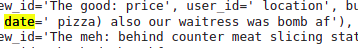

In [95]:
rdd_2.map(lambda x: (x.user_id, (x.date, x.text))).filter(lambda x:  (x[1][0] != None)   and   (x[1][1] != None)  ).filter(lambda x: "pizza" in x[1][1]).take(3)

[('bHSoye7R5cL-LVWLxtaxMg',
  ('2017-09-08 23:20:19',
   'We started with the artichoke dip, big mistake. It was cold and the chips were stale. Mentioned to our waitress, but nothing came of it.  We ordered a large pizza, thin crust which after adding toppings it was a bit pricey for pizza.  Pizza was ok, not great. Except for not being our advocate our server was good.  I have been here before for Cardinals game, it was better then. Will try another venue next time.')),
 ('3inG_FUhm28tUJc0zZ2fCg',
  ('2017-08-16 15:43:19',
   "We visited once and were very disappointed in my veggie pizza and my husband's sub sandwich.  The tomato sauce was not tasty, and they did not use enough cheese on my pizza.  The dough looked and tasted like it was prepared by a machine.  Perhaps they have improved, but we are not in any rush to try a second time.")),
 ('hPVeIiJxQwwcvp6CUXk_UA',
  ('2018-04-15 15:46:22',
   'I love this restaurant. The owners are the nicest family. The food is delicious!!. My fa

En el take de arriba no parece haber problema. Pero **el campo date sigue con información de reviews**. Armo otro filtro con el tamaño del string (exactamente 19 caracteres, que contenga ":" y también "-". Eso logra filtrarme unicamente las fechas. Luego paso a formato fecha y **para cada key (user) me quedo solo con el registro de fecha más grande (más actual)**.

In [101]:
rdd_3 = rdd_2.map(lambda x: (x.user_id, (x.date, x.text))).filter(lambda x:  (x[1][0] != None)   and   (x[1][1] != None)  ).filter(lambda x: "pizza" in x[1][1])
rdd_3 = rdd_3.filter(lambda x:  (len(x[1][0]) == 19)  and   (":" in x[1][0] )  and  ("-" in x[1][0])    )
rdd_3 = rdd_3.reduceByKey(lambda a,b: a if  datetime.strptime(a[0], '%Y-%m-%d %H:%M:%S') > datetime.strptime(b[0], '%Y-%m-%d %H:%M:%S') else b)
rdd_3.take(5)


[('iYwyZB3O28cXcuy5Sfl_yw',
  ('2017-07-28 23:41:16',
   "Finally! Great pizza & knots at the beach!!! Excellent location with a cool street presence. These guys know what they're doing.")),
 ('bUUPVJ7l6vWSvZV1W8G8Bw',
  ('2017-09-09 03:15:00',
   'Came late Friday night for a bite to eat. Much of the soup, hot takeaway were cleaned up. Settled for an individual pizza to share. Crust was too thick, but we could debate pies until the cows come home. Wandered the store while it was baking and found Scharffenberger chocolate! Pie may not be up to our standard but the chocolate hit the spot. At 8pm at night, the staff was exhausted')),
 ('TA_McHKN9QEM73JJFXv3Cw',
  ('2018-07-08 00:19:27',
   'It really upsets me that Five Star pizza does NOT have five stars. Really great pizza. Do not get the cinnamon bite things. The pepperoni bites are super yummy. Their pizzas are very large and nicely priced. Always coupons/deals on their website when you order. Food is usually ready to be picked up in

Ahora que ya tengo la ultima review con la palabra pizza de cada user (obviamente algunos users no tienen). Hago un join con 'rdd_cached' que **también tiene el id del user como Key**, y luego el nombre y la antiguedad. 



In [106]:
rdd_cached.join(rdd_3).take(2)


[('hJ804zpYWnli8KMiSGVrjw',
  (('Lara', 4444),
   ('2017-11-19 19:47:47',
    "Honestly, if I could give this place more than 5 stars I would! I had the best dinner and drinks here. From the flat bread pistachio pesto pizza, cauliflower and dates appetizer, and the crab pasta, I was blown away!  I couldn't believe how fresh the food was! The service is impeccable. After dinner, Poppi made us some great drinks and gave us amazing service. Ask for him next time you grab a drink here! The decor in the restaurant was really stunning as well. I think this is my new spot and I can't wait to come back! Also, the chef came out and spoke to us which was such a nice treat. Very humble and talented! Thanks again!"))),
 ('9I4LrQ-vns7Pb_srlHG0DA',
  (('Jennie', 3689),
   ('2017-11-30 21:22:18',
    "We came to Mellow Mushroom for trivia on the Wednesday night before Thanksgiving. The food was great, the service was good, and the trivia game was poppin'. I enjoyed the spinach dip appetizer and a mig

**Busco el user más antiguo**
  
user_id = key

(user_id ,  ( (nombre, *dias de antiguedad en yelp*) , (fecha ultima noticia con la palabra pizza , noticia con la palabra pizza)  )   )

x[1][0][1] --> Antiguedad

In [113]:
rdd_final = rdd_cached.join(rdd_3)
rdd_final.reduce(lambda a,b: a if a[1][0][1] > b[1][0][1] else b)

('HrdxjjW4Z9WHWYGjWzaq6g',
 (('mykeah', 6558),
  ('2021-11-03 02:02:15',
   'Such good pizza! Their crust is bomb and their gluten free options are awesome! Get the breadsticks...so good! This has become our favorite pizza in town.')))

El user más antiguo cuya ultima review posee la palabra pizza es **mykeah** (user_id = HrdxjjW4Z9WHWYGjWzaq6g) y su review es: **'Such good pizza! Their crust is bomb and their gluten free options are awesome! Get the breadsticks...so good! This has become our favorite pizza in town.'**